# IRIS FLOWER CLASSIFICATION

In [50]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("IRISdataset.csv")

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### HISTOGRAM

<Axes: >

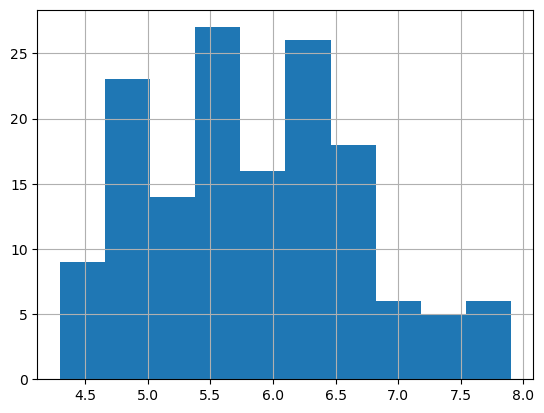

In [25]:
df['sepal_length'].hist()

<Axes: >

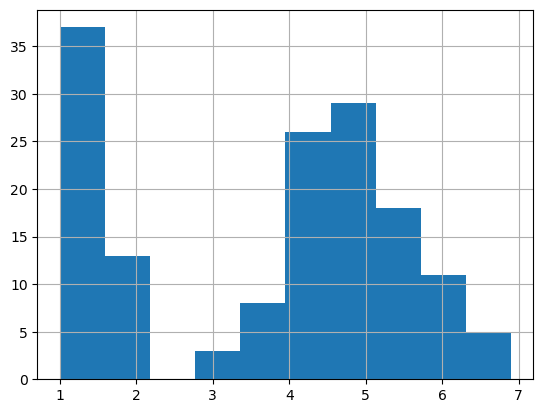

In [27]:
df['petal_length'].hist()

<Axes: >

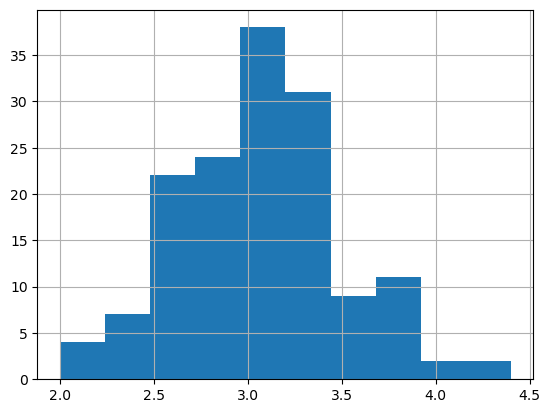

In [29]:
df['sepal_width'].hist()

<Axes: >

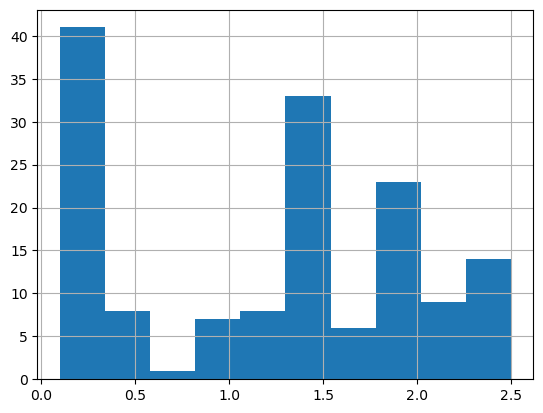

In [31]:
df['petal_width'].hist()

### ScatterPlot

In [40]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

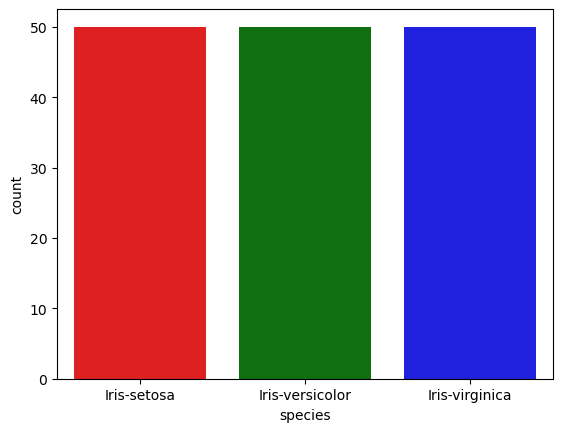

In [181]:
colors=['red','yellow','blue']
sns.countplot(x='species',data=df,hue='species',palette=['red','green','blue'],legend=False)
plt.show()

In [42]:
colors=['red','purple','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

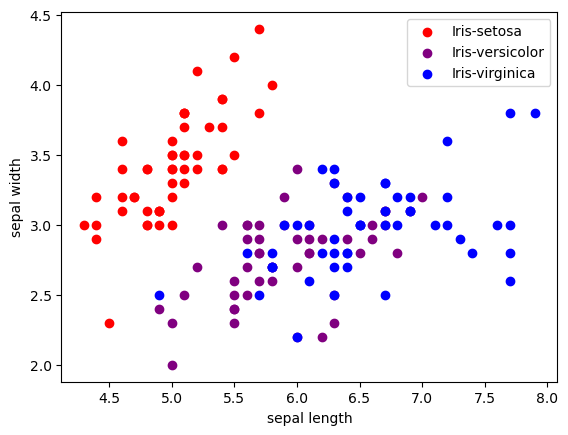

In [64]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

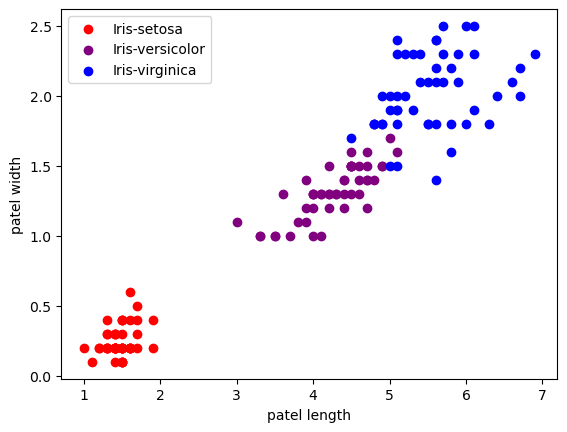

In [68]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("patel length")
plt.ylabel("patel width")
plt.legend()

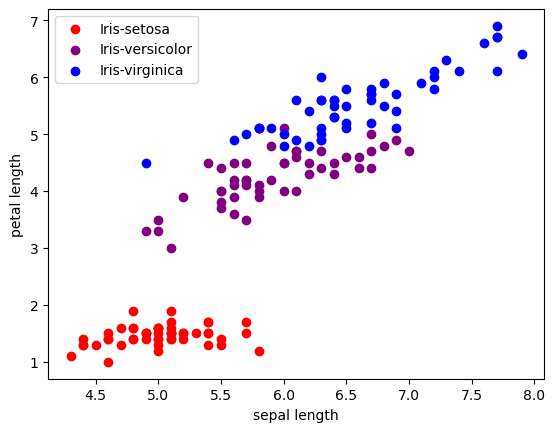

In [70]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

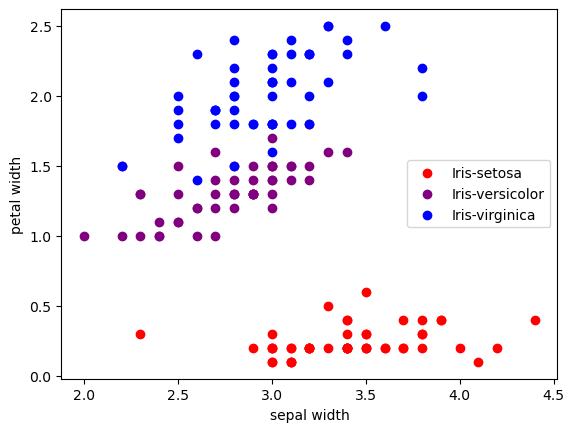

In [72]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

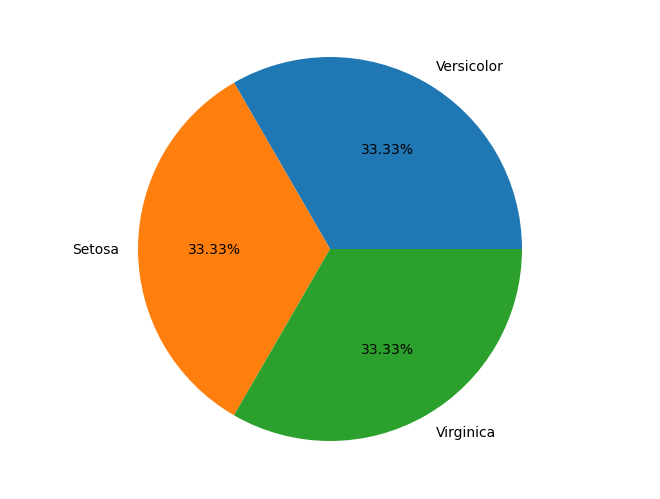

In [161]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['Versicolor','Setosa','Virginica']
s=[50,50,50]
ax.pie(s,labels=l,autopct='%1.2f%%')
plt.show()

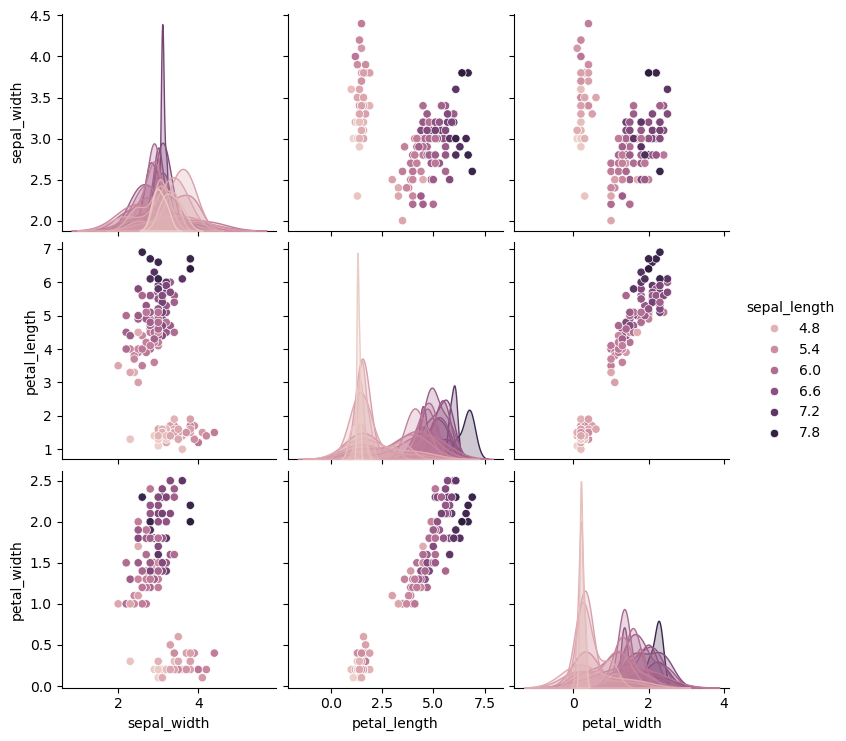

In [83]:
sns.pairplot(df,hue='sepal_length')

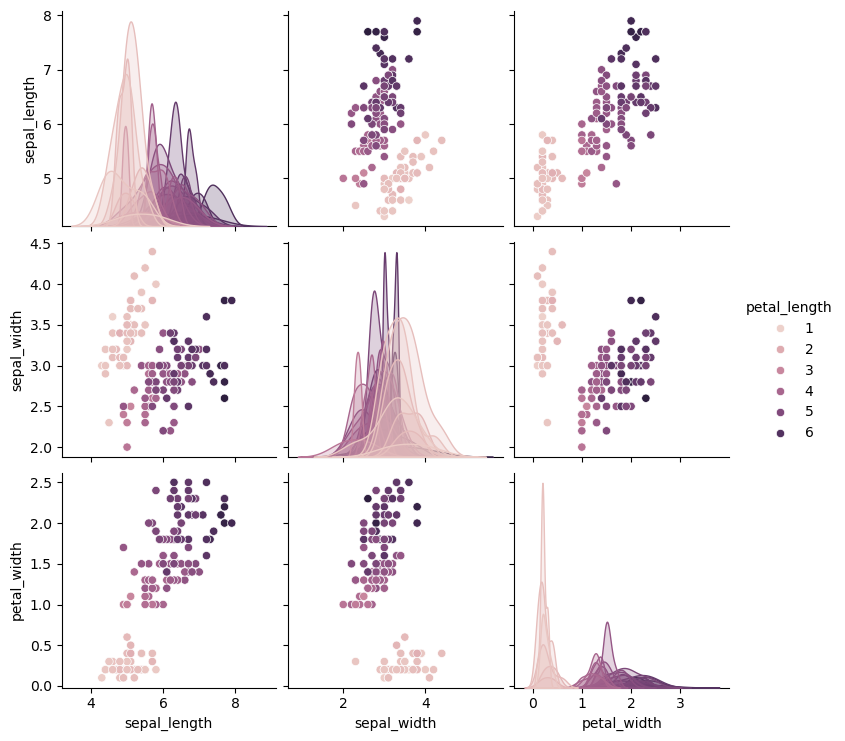

In [87]:
sns.pairplot(df,hue='petal_length')

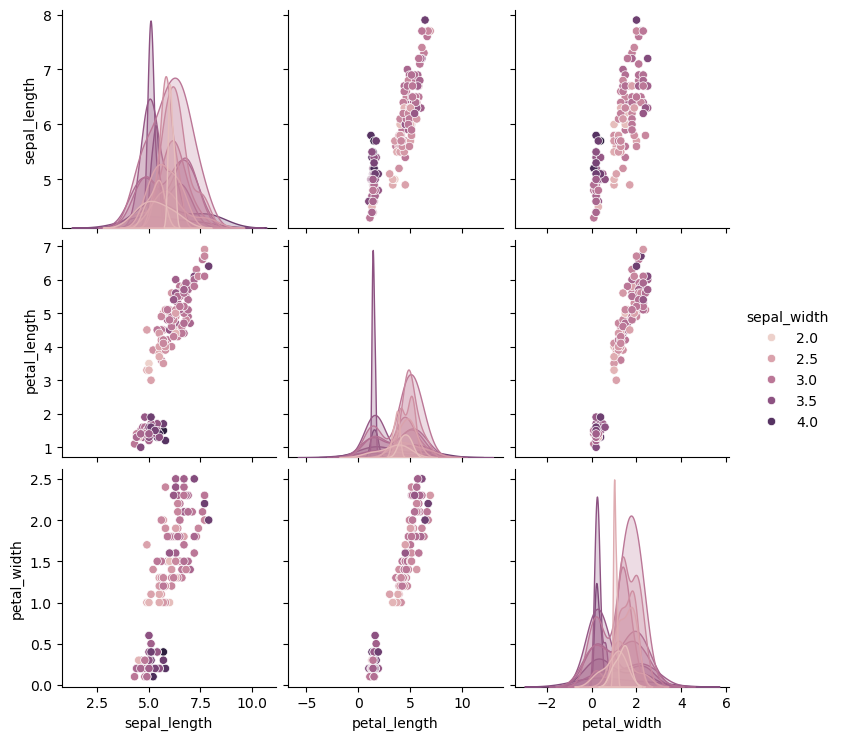

In [89]:
sns.pairplot(df,hue='sepal_width')

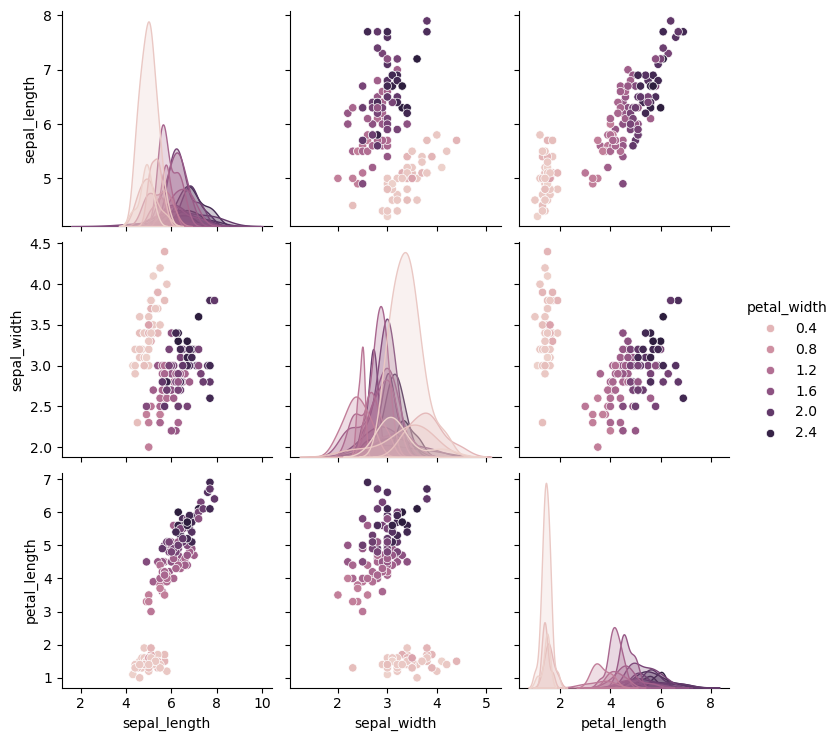

In [91]:
sns.pairplot(df,hue='petal_width')

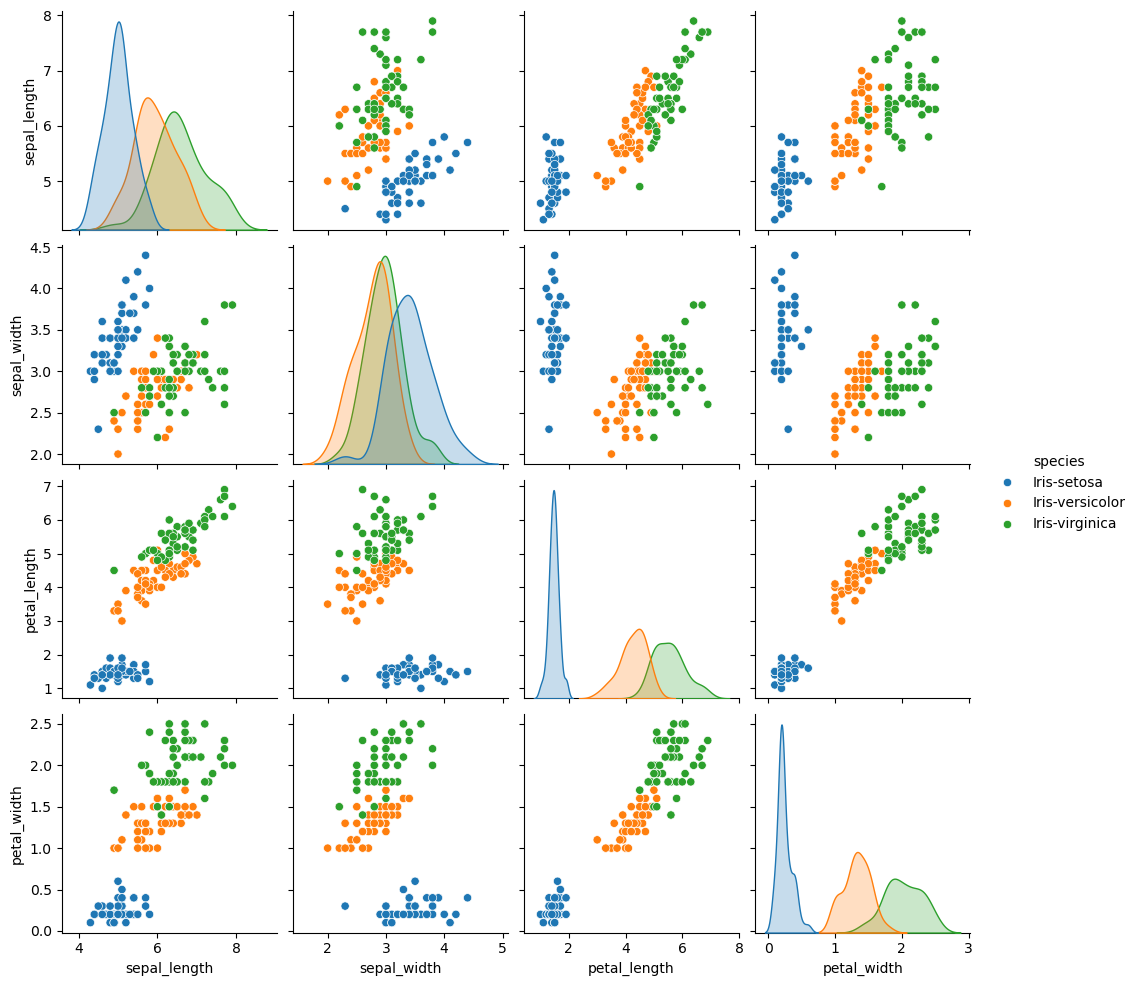

In [93]:
sns.pairplot(df,hue='species')

<Axes: >

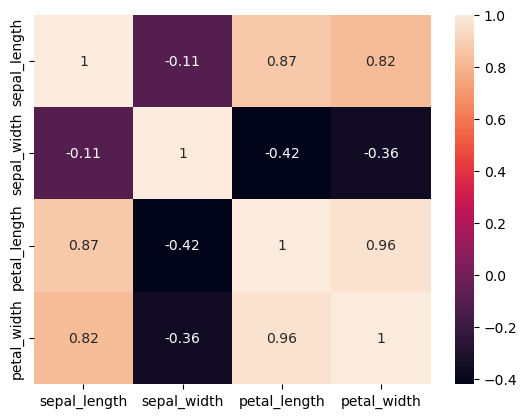

In [187]:
df.drop(['species'],axis=1,inplace=True)
corr=df.corr()
sns.heatmap(corr,annot=True)

In [132]:
data=df.values
X=data[:,0:4]
Y=data[:,4]

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

### LOGISTIC REGRESSION

In [112]:
from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(X_train,y_train)

SVC()

In [120]:
from sklearn.metrics import accuracy_score
prediction1=model_svc.predict(X_test)
print(accuracy_score(y_test,prediction1))

0.9666666666666667


In [126]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [130]:
prediction2=model_lr.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction2)*100)

96.66666666666667


### Decision Tree Classifier

In [137]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [143]:
prediction3=model_svc.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction3))

0.9666666666666667


In [153]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.80      1.00      0.89         4

       accuracy                           0.97        30
      macro avg       0.93      0.97      0.95        30
   weighted avg       0.97      0.97      0.97        30



In [155]:
print(classification_report(y_test,prediction2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.80      1.00      0.89         4

       accuracy                           0.97        30
      macro avg       0.93      0.97      0.95        30
   weighted avg       0.97      0.97      0.97        30



In [157]:
print(classification_report(y_test,prediction3))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.80      1.00      0.89         4

       accuracy                           0.97        30
      macro avg       0.93      0.97      0.95        30
   weighted avg       0.97      0.97      0.97        30

